<a href="https://colab.research.google.com/github/me5m7/System-Software-lab/blob/master/Approximating_Quadratic_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Gradient Descent Optimization
This notebook demonstrates the application of the JAX library in performing simple gradient descent, which is an excellent option for deep learning research. A basic model is constructed to be trained on a small dataset that represents a quadratic function. The objective of the model is to accurately approximate the quadratic function.

In [ ]:

import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, jit

## Model Creation

In [ ]:
# initilize a given layer by scaling the weights according to its input and output dimensions
def init_weights(input_dims, output_dims):
  return np.random.normal(size=(input_dims, output_dims)) * np.sqrt(2/input_dims)


# create a model providing the width of each layer
def init_model(widths):
  params = []
  for input_dims, output_dims in zip(widths[:-1], widths[1:]):
    params.append(dict(weights= init_weights(input_dims, output_dims), biases=np.ones(shape=(output_dims,))))
  return params


# create the model parameters (p)
p = init_model([1, 128, 124, 1])

In [ ]:

import jax
import jax.tree_util as tu
shapes=tu.tree_map(lambda x: x.shape, p)
print(shapes)

[{'biases': (128,), 'weights': (1, 128)}, {'biases': (124,), 'weights': (128, 124)}, {'biases': (1,), 'weights': (124, 1)}]


# Dataset

In [ ]:
# pick random samples for the input points
xs = np.random.normal(size=(128, 1))
# apply the quadratic function and get the true output y
ys = xs ** 2


## Forward and Backward Pass

In [ ]:
def forward(p, x):
    *hidden, last = p
    for layer in hidden:
        x = jax.nn.relu(x @ layer['weights'] + layer['biases'])
    return x @ last['weights'] + last['biases']


def loss_fn(p, x, y):
    yh = forward(p, x)
    return jnp.mean((yh - y) ** 2)


def update_rule(p, g):
    lr = 0.0001
    return p - lr * g

@jax.jit
def update(p, x, y):
    gradients = jax.grad(loss_fn)(p, x, y)
    return jax.tree.map(update_rule, p, gradients)

# Training and Testing

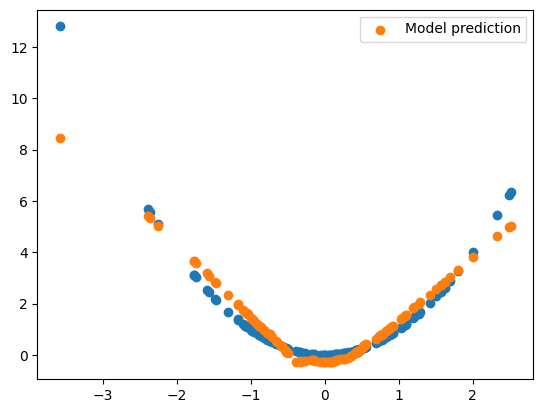

In [ ]:
# train the model for 1000 epochs
for _ in range(1000):
  p = update(p, xs, ys)

# Now use the input points to check
plt.scatter(xs, ys)
predictions = forward(p, xs)
plt.scatter(xs, predictions, label='Model prediction')
plt.legend()

# Adam Optimiser


Update	Gradient Descent Error	Adam Error
0	1.1374			0.4734
10	0.2246			0.2836
20	0.2093			0.2088
30	0.2058			0.1796
40	0.2029			0.1616
50	0.2001			0.1471
60	0.1973			0.1344
70	0.1947			0.1231
80	0.1920			0.1128
90	0.1895			0.1034
100	0.1870			0.0948
110	0.1846			0.0866
120	0.1822			0.0783
130	0.1799			0.0705
140	0.1776			0.0632
150	0.1754			0.0564
160	0.1733			0.0501
170	0.1712			0.0452
180	0.1692			0.0391
190	0.1672			0.0344
200	0.1652			0.0303
210	0.1633			0.0266
220	0.1615			0.0234
230	0.1596			0.0206
240	0.1579			0.0181
250	0.1561			0.0160
260	0.1544			0.0141
270	0.1528			0.0125
280	0.1512			0.0111
290	0.1496			0.0099
300	0.1481			0.0089
310	0.1466			0.0079
320	0.1451			0.0071
330	0.1437			0.0064
340	0.1423			0.0058
350	0.1409			0.0052
360	0.1396			0.0048
370	0.1382			0.0043
380	0.1370			0.0040
390	0.1357			0.0036
400	0.1345			0.0033
410	0.1333			0.0030
420	0.1321			0.0028
430	0.1310			0.0026
440	0.1299			0.0024
450	0.1288			0.0022
460	0.1277			0.0020
470	0.1267			0.0019
480	0.1257

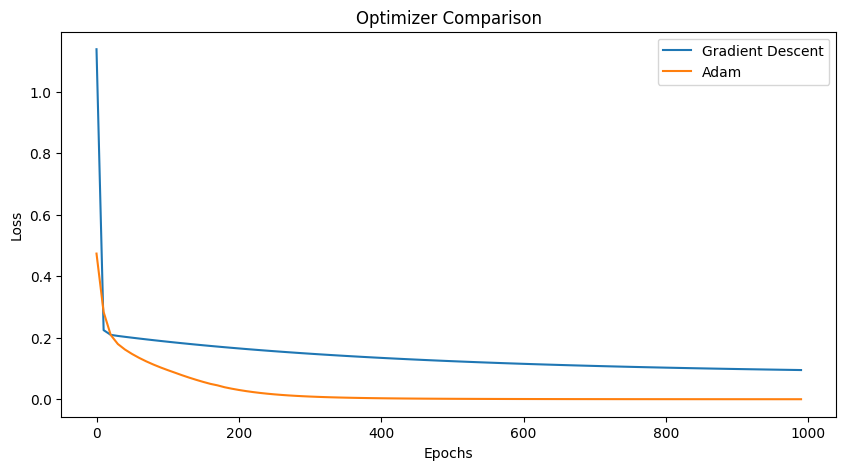

In [ ]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import grad, jit

# Initialize weights and biases with He initialization for ReLU activation
def init_weights(input_dim, output_dim):
    bound = np.sqrt(6 / input_dim)
    return (np.random.uniform(-bound, bound, (input_dim, output_dim)), np.zeros(output_dim))

# Model definition with ReLU activations
def model(params, x):
    activations = x
    for w, b in params[:-1]:
        activations = jax.nn.relu(jnp.dot(activations, w) + b)
    final_w, final_b = params[-1]
    return jnp.dot(activations, final_w) + final_b

# Mean Squared Error Loss function
def mse_loss(params, x, y):
    pred = model(params, x)
    return jnp.mean((pred - y) ** 2)

# Simple Gradient Descent update function
def update_params(params, grads, lr=0.001):
    return [(w - lr * dw, b - lr * db) for (w, b), (dw, db) in zip(params, grads)]

# Adam Optimizer
def init_adam(params):
    return [(jnp.zeros_like(w), jnp.zeros_like(b)) for w, b in params], [(jnp.zeros_like(w), jnp.zeros_like(b)) for w, b in params]

def update_adam(params, grads, ms, vs, t, lr=0.001, b1=0.9, b2=0.999, eps=1e-8):
    ms_updated = []
    vs_updated = []
    params_updated = []
    for (w, b), (dw, db), (m_w, m_b), (v_w, v_b) in zip(params, grads, ms, vs):
        m_w = b1 * m_w + (1 - b1) * dw
        m_b = b1 * m_b + (1 - b1) * db
        v_w = b2 * v_w + (1 - b2) * (dw**2)
        v_b = b2 * v_b + (1 - b2) * (db**2)
        m_w_hat = m_w / (1 - b1**t)
        m_b_hat = m_b / (1 - b1**t)
        v_w_hat = v_w / (1 - b2**t)
        v_b_hat = v_b / (1 - b2**t)
        w_updated = w - lr * m_w_hat / (jnp.sqrt(v_w_hat) + eps)
        b_updated = b - lr * m_b_hat / (jnp.sqrt(v_b_hat) + eps)
        ms_updated.append((m_w, m_b))
        vs_updated.append((v_w, v_b))
        params_updated.append((w_updated, b_updated))
    return params_updated, ms_updated, vs_updated

# Generate synthetic data
xs = np.linspace(-2, 2, 128).reshape(-1, 1)
ys = xs ** 2

# Initialize parameters
layer_sizes = [1, 64, 64, 1]
params = [init_weights(layer_sizes[i], layer_sizes[i + 1]) for i in range(len(layer_sizes) - 1)]

# Train with Gradient Descent
error_values_gd = []
params_gd = params.copy()
for epoch in range(1000):
    grads = grad(mse_loss)(params_gd, xs, ys)
    params_gd = update_params(params_gd, grads, lr=0.001)
    if epoch % 10 == 0:  # Collect errors every 10 epochs
        loss = mse_loss(params_gd, xs, ys)
        error_values_gd.append(loss)

# Train with Adam Optimizer
error_values_adam = []
params_adam = params.copy()
ms, vs = init_adam(params_adam)
for epoch in range(1, 1001):
    grads = grad(mse_loss)(params_adam, xs, ys)
    params_adam, ms, vs = update_adam(params_adam, grads, ms, vs, epoch)
    if epoch % 10 == 0:  # Collect errors every 10 epochs
        loss = mse_loss(params_adam, xs, ys)
        error_values_adam.append(loss)

# Print errors every 10 updates for both optimizers
print("Update\tGradient Descent Error\tAdam Error")
for i in range(min(len(error_values_gd), len(error_values_adam))):
    print(f"{i * 10}\t{error_values_gd[i]:.4f}\t\t\t{error_values_adam[i]:.4f}")

# Optionally, you can plot the results for visual comparison
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1000, 10), error_values_gd, label='Gradient Descent')
plt.plot(np.arange(0, 1000, 10), error_values_adam, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimizer Comparison')
plt.show()


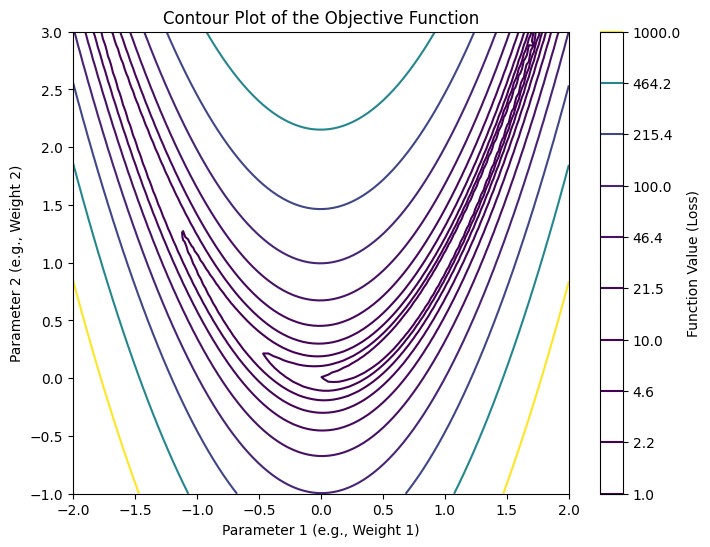

In [ ]:
# إنشاء شبكة من القيم لـ x و y
x_vals = jnp.linspace(-2.0, 2.0, 100)
y_vals = jnp.linspace(-1.0, 3.0, 100)
X, Y = jnp.meshgrid(x_vals, y_vals)

# دالة Rosenbrock (كمثال لدالة الهدف)
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

Z = rosenbrock(X, Y)

# رسم المخطط الكفافي
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=jnp.logspace(0, 3, 10), cmap='viridis')
plt.colorbar(contour, label='Function Value (Loss)')
plt.title('Contour Plot of the Objective Function')
plt.xlabel('Parameter 1 (e.g., Weight 1)')
plt.ylabel('Parameter 2 (e.g., Weight 2)')
plt.savefig('Contour_Plot.png') # حفظ الرسم
plt.show()

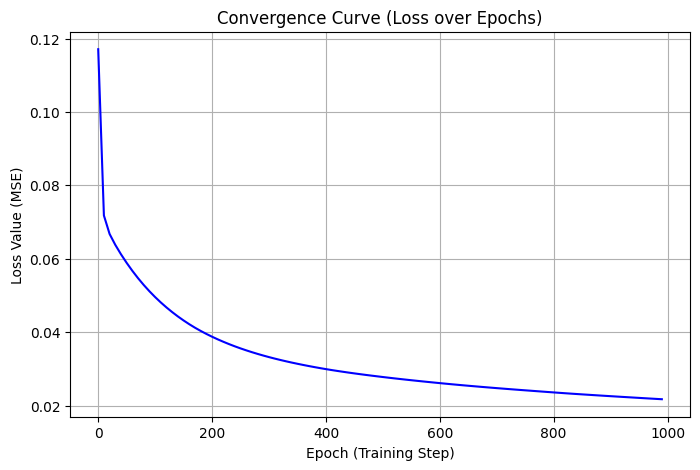

In [ ]:
# تهيئة قائمة لتسجيل قيمة الخسارة
loss_history = []

# تدريب النموذج لـ 1000 حقبة (epoch)
for i in range(1000):
  p = update(p, xs, ys)

  # حساب الخسارة وتسجيلها (كل 10 خطوات مثلاً لتسريع الأداء)
  if i % 10 == 0:
    current_loss = loss_fn(p, xs, ys)
    loss_history.append(current_loss)

# ---
# كود رسم مسار التقارب
plt.figure(figsize=(8, 5))
plt.plot(range(0, 1000, 10), loss_history, color='blue')
plt.title('Convergence Curve (Loss over Epochs)')
plt.xlabel('Epoch (Training Step)')
plt.ylabel('Loss Value (MSE)')
plt.grid(True)
plt.savefig('Convergence_Curve.png') # حفظ الرسم
plt.show()